In [2]:
import pandas as pd
import numpy as np
import seaborn as sns

import statsmodels.api as sm

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

from sklearn.metrics import r2_score, mean_absolute_percentage_error

import matplotlib.pyplot as plt

In [4]:
DATA_PATH = './LR_advertising.csv'

In [5]:
df = pd.read_csv(DATA_PATH)

In [6]:
df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [8]:
df.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


<Axes: >

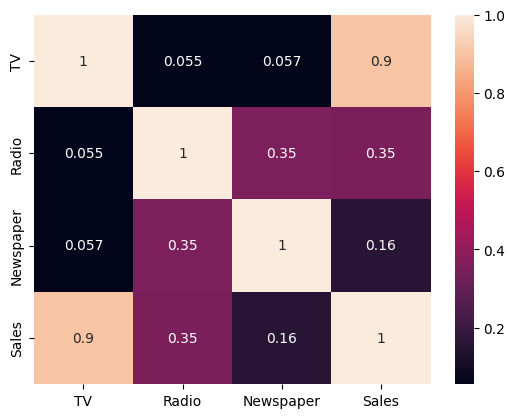

In [9]:
sns.heatmap(df.corr(), annot=True)

In [10]:
X = df[['TV', 'Radio', 'Newspaper']].values
y = df['Sales'].values

In [19]:
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.2, random_state=20240415)

print(X_train.shape, Y_train.shape)
print(X_test.shape, Y_test.shape)

(160, 3) (160,)
(40, 3) (40,)


In [20]:
lr_model = LinearRegression()
lr_model.fit(X=X_train, y=Y_train)

LinearRegression()

In [21]:
print(f'R^2 score: {r2_score(y_true=Y_test, y_pred=lr_model.predict(X_test))}')

R^2 score: 0.8899911351140432


In [22]:
print(f'MAPE score: {mean_absolute_percentage_error(y_true=Y_test, y_pred=lr_model.predict(X_test))}')

MAPE score: 0.10483917290642844


In [23]:
import statsmodels

In [24]:
# added constant to get intercept 
# intercept is a sales volume if we do not use any advertising
ols = sm.OLS(Y_train, sm.add_constant(X_train)).fit()

In [25]:
ols.params

array([ 4.4943138 ,  0.05548576,  0.11223769, -0.00598904])

In [26]:
ols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.905
Model:                            OLS   Adj. R-squared:                  0.903
Method:                 Least Squares   F-statistic:                     492.9
Date:                Mon, 15 Apr 2024   Prob (F-statistic):           2.49e-79
Time:                        12:03:06   Log-Likelihood:                -304.74
No. Observations:                 160   AIC:                             617.5
Df Residuals:                     156   BIC:                             629.8
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.4943      0.349     12.875      0.000       3.805       5.184
x1             0.0555      0.002     36.062      0.000       0.052       0.059
x2             0.1122      0.009     12.119      0.000       0.094       0.131
x3            -0.0060      0.007     -0.908      0.365      -0.019       0.007
==============================================================================
Omnibus:                       21.640   Durbin-Watson:                   1.902
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               46.033
Skew:                          -0.587   Prob(JB):                     1.01e-10
Kurtosis:                       5.351   Cond. No.                         465.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [27]:
r2_score(Y_test, ols.predict(sm.add_constant(X_test)))

0.8899911351140432

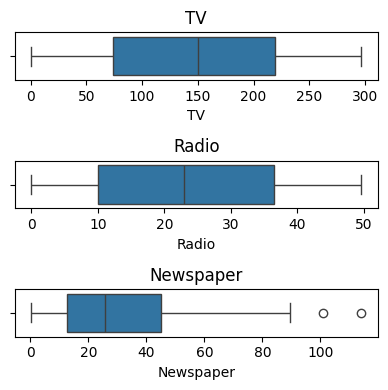

In [28]:
fig, axs = plt.subplots(3,1,figsize=(4,4))

axs[0].set_title('TV')
sns.boxplot(df['TV'], orient="h", ax=axs[0])
axs[1].set_title('Radio')
sns.boxplot(df['Radio'], orient="h", ax=axs[1])
axs[2].set_title('Newspaper')
sns.boxplot(df['Newspaper'], orient="h", ax=axs[2])

plt.tight_layout()

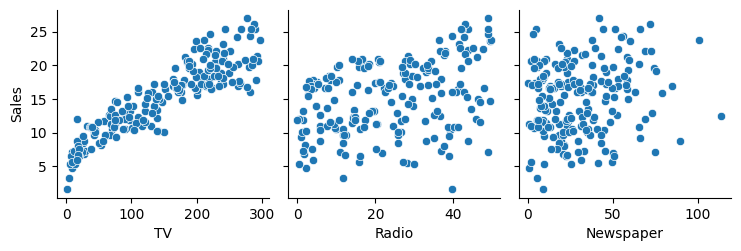

In [29]:
sns.pairplot(df,x_vars=['TV','Radio','Newspaper'],y_vars='Sales')

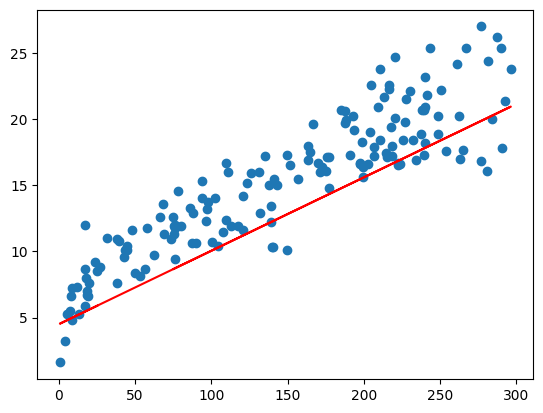

In [33]:
plt.scatter(X_train[:,0], Y_train)
plt.plot(X_train[:, 0], ols.params[0]+ols.params[1]*X_train[:,0], color='r')